Downloading the Dataset

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-04-27 01:58:29--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.252.210, 2600:1417:3f:f83::317f, 2600:1417:3f:f80::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.252.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   130MB/s    in 5.8s    

2023-04-27 01:58:35 (136 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Extracting the image files

In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

Check if the device is CPU or GPU

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
print(device)

cuda


In [6]:
from torchvision import models
import torch
 
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [7]:
vgg16 = models.vgg16(weights=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 274MB/s]


In [8]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Exploratory Data Analysis

In [10]:
path = 'PetImages'

for folder in os.listdir(path):
  for img_file in os.listdir(os.path.join(path,folder)):
    img_file = os.path.join(path,folder,img_file)

    try:
      img = Image.open(img_file)
      if img.mode != 'RGB':
        os.remove(img_file)
    except:
      os.remove(img_file)


/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Image Augmentation

In [11]:
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

dataset = datasets.ImageFolder('PetImages',transform=transform)
dataset_len = len(dataset)

train_len, test_len = dataset_len-6000,6000
train_set,test_set = torch.utils.data.random_split(dataset,[train_len,test_len])
batch_size = 15


train_set = DataLoader(dataset=train_set, shuffle=True, batch_size=batch_size)
test_set = DataLoader(dataset=test_set, shuffle=True, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using Device:  ',device)

Using Device:   cuda


In [12]:
print(train_len)

18931


In [13]:
print(test_len)

6000


Building CNN

In [14]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model,self).__init__()

    self.pool = nn.MaxPool2d(2,2)
    self.dropout = nn.Dropout(p=0.2)

    self.conv1 = nn.Conv2d( in_channels=3, out_channels=6, kernel_size=4)
    self.conv2 = nn.Conv2d( in_channels=6, out_channels=12, kernel_size=4)
    self.conv3 = nn.Conv2d( in_channels=12, out_channels=14, kernel_size=4)
    self.conv4 = nn.Conv2d( in_channels=14, out_channels=16, kernel_size=4)
    self.conv5 = nn.Conv2d( in_channels=16, out_channels=20, kernel_size=4)


    self.fc1 = nn.Linear( in_features= 20*4*4, out_features=250 )
    self.fc2 = nn.Linear( in_features= 250,    out_features=200 )
    self.fc3 = nn.Linear( in_features= 200,    out_features=50  )
    self.fc4 = nn.Linear( in_features= 50,     out_features=10  )
    self.fc5 = nn.Linear( in_features= 10,     out_features=2   )

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.pool(F.relu(self.conv4(x)))
    x = self.pool(F.relu(self.conv5(x)))

    x = x.reshape(-1,20*4*4)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = self.dropout(F.relu(self.fc4(x)))
    x = self.fc5(x)
    return x

net = Model().to(device)



print(net)
    


Model(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(3, 6, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(12, 14, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(14, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv5): Conv2d(16, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=2, bias=True)
)


Defining Parameters for the Model

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)

Training the Model

In [16]:
net.train()

for epoch in range(10):
  total_correct = 0.0
  running_loss = 0.0
  for i, (inputs,labels) in enumerate(train_set):
    inputs,labels = inputs.to(device),labels.to(device)
    
    output = net(inputs)
    output_idx = torch.argmax(output,dim=1)
    total_correct += (labels == output_idx).sum().item()
    optimizer.zero_grad()
    loss = criterion(output,labels)
    running_loss += loss.item() * inputs.size(0)
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch}  Loss: {running_loss/train_len}  Accuracy:{(total_correct/train_len)*100}%')

print('Finished Training')


Epoch: 0  Loss: 0.6452349543785572  Accuracy:61.829802968675715%
Epoch: 1  Loss: 0.5588604905032789  Accuracy:72.56880249326501%
Epoch: 2  Loss: 0.4856939937463433  Accuracy:77.59759125244308%
Epoch: 3  Loss: 0.43654918833445117  Accuracy:80.67719613332629%
Epoch: 4  Loss: 0.3990515557791593  Accuracy:82.57355660028524%
Epoch: 5  Loss: 0.3645616361181909  Accuracy:84.26390576303417%
Epoch: 6  Loss: 0.3391496028857791  Accuracy:85.39960910675612%
Epoch: 7  Loss: 0.33155080604764803  Accuracy:85.87501980877926%
Epoch: 8  Loss: 0.3121326813512375  Accuracy:86.7835824837568%
Epoch: 9  Loss: 0.29390118695613277  Accuracy:87.62347472399767%
Finished Training


Determining Test Accuracy and Loss

In [17]:
with torch.no_grad():
  net.eval()
  total_loss = 0.0
  total_correct = 0.0

  for inputs,labels in test_set:
    labels = labels.to(device)
    outputs = net(inputs.to(device))
    loss = criterion(outputs,labels)
    total_loss += loss.item() * inputs.size(0)
    output_idx = torch.argmax(outputs, dim=1)
    total_correct += sum(labels==output_idx)
  
  print(f'Accuracy : {(total_correct/test_len)*100}%  Loss: {total_loss/ test_len}')


Accuracy : 85.19999694824219%  Loss: 0.36825413182377814


Saving the Model

In [18]:
torch.save(net.state_dict(),'cat_vs_dog.pt')

In [19]:
with torch.no_grad():
  model = Model().to(device)
  model.load_state_dict(torch.load('cat_vs_dog.pt'))
  model.eval()

  total_correct = 0.0

  for inputs,labels in test_set:
    labels = labels.to(device)
    outputs = model(inputs.to(device))
    output_idx = torch.argmax(outputs,dim = 1)
    total_correct += sum(labels==output_idx)
  print(f'Accuracy : {(total_correct/test_len)*100}%')

Accuracy : 85.19999694824219%


Prediction using CNN

In [20]:
img = Image.open('./9994.jpg')
img = transform(img).unsqueeze(dim=0).to(device)
prediction = net(img)
print(torch.argmax(prediction))

tensor(1, device='cuda:0')


Constructing VGG16 Network

In [50]:
class VGG16(nn.Module):
  def __init__(self,num_classes=2):
    super(VGG16,self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(), 
        nn.MaxPool2d(kernel_size = 2, stride = 2))
            
    self.layer3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU())
    
    self.layer4 = nn.Sequential(
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
          
    self.layer5 = nn.Sequential(
         nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(256),
         nn.ReLU())
           
    self.layer6 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU())
            
    
    self.layer7 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
            
    self.layer8 = nn.Sequential(
         nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU())
           
    self.layer9 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU())
            
    
    self.layer10 = nn.Sequential(
         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size = 2, stride = 2))
           
    self.layer11 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU())
            
    self.layer12 = nn.Sequential(
         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU())
           
    self.layer13 = nn.Sequential(
         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size = 2, stride = 2))
           
    self.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(7*7*512, 4096),
        nn.ReLU())
            
    self.fc1 = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU())
            
    self.fc2= nn.Sequential(
        nn.Linear(4096, num_classes))
            
        
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = self.layer6(out)
    out = self.layer7(out)
    out = self.layer8(out)
    out = self.layer9(out)
    out = self.layer10(out)
    out = self.layer11(out)
    out = self.layer12(out)
    out = self.layer13(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out

In [22]:
num_classes = 2
batch_size = 16
num_epochs = 15
learning_rate = 0.005

model1 = VGG16(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.005)  



total_step = len(train_set)

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [24]:
total_step = len(train_set)

for epoch in range(num_epochs):
  total_correct = 0.0
  running_loss = 0.0
  for i, (images,labels) in enumerate(train_set):
    images,labels = images.to(device),labels.to(device)
    outputs = model1(images)
    output_idx = torch.argmax(outputs,dim=1)
    total_correct += (labels == output_idx).sum().item()
    optimizer.zero_grad()                                                                                                                                                          
    loss = criterion(outputs,labels)
    running_loss += loss.item() * inputs.size(0)
    loss.backward()
    optimizer.step()
  
  print (f'Epoch {epoch} Loss: {running_loss/train_len} Accuracy:{(total_correct/train_len)*100}%')

Epoch 0 Loss: 0.7019365171668055 Accuracy:49.53251280967725%
Epoch 1 Loss: 0.7007913790258702 Accuracy:49.66457133801701%
Epoch 2 Loss: 0.7011232304753154 Accuracy:49.960382441498076%
Epoch 3 Loss: 0.7006318650194786 Accuracy:49.98151180603244%
Epoch 4 Loss: 0.7009431449322043 Accuracy:49.59590090328033%
Epoch 5 Loss: 0.7001048843636829 Accuracy:49.79134752522318%
Epoch 6 Loss: 0.701224325664271 Accuracy:49.59590090328033%
Epoch 7 Loss: 0.7016974411608458 Accuracy:49.77021816068882%
Epoch 8 Loss: 0.7014846702894264 Accuracy:49.84417093655908%
Epoch 9 Loss: 0.7006598450410738 Accuracy:49.912841371295755%
Epoch 10 Loss: 0.7022101870713323 Accuracy:49.53779515081084%
Epoch 11 Loss: 0.7013950712939877 Accuracy:49.933970735830115%
Epoch 12 Loss: 0.7015491549050988 Accuracy:49.58533622101315%
Epoch 13 Loss: 0.7008820630330165 Accuracy:49.4479953515398%
Epoch 14 Loss: 0.6992420628308733 Accuracy:50.10300565210501%


In [25]:
with torch.no_grad():
  model1.eval()
  total_loss = 0.0
  total_correct = 0.0

  for images,labels in test_set:
    labels = labels.to(device)
    outputs = model1(images.to(device))
    loss = criterion(outputs,labels)
    total_loss += loss.item() * images.size(0)
    output_idx = torch.argmax(outputs,dim=1)
    total_correct += sum(labels == output_idx)
 
print(f'Accuracy : {(total_correct/test_len)*100}%  Loss: {total_loss/ test_len}')


Accuracy : 50.25%  Loss: 0.6927518337965012


In [26]:
torch.save(net.state_dict(),'cat_vs_dog_1.pt')

In [27]:
with torch.no_grad():
  model = VGG16().to(device)
  model.load_state_dict(torch.load('cat_vs_dog_1.pt'),strict=False)
  model.eval()

  total_correct = 0.0

  for images,labels in test_set:
    labels = labels.to(device)
    outputs = model(inputs.to(device))
    output_idx = torch.argmax(outputs,dim=1)
    total_correct += sum(labels==output_idx)
  print(f'Accuracy : {(total_correct/test_len)*100}%  ')

Accuracy : 50.13333511352539%  


In [28]:
img = Image.open('./10.jpg')
img = transform(img).unsqueeze(dim=0).to(device)
prediction = net(img)
print(torch.argmax(prediction))

tensor(0, device='cuda:0')


GRAD CAM


In [29]:
!git clone https://github.com/parth1620/GradCAM-Dataset.git 
!pip install -U git+https://github.com/albumentations-team/albumentations 
!pip install --upgrade opencv-contrib-python 

Cloning into 'GradCAM-Dataset'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 193 (delta 0), reused 193 (delta 0), pack-reused 0
Receiving objects: 100% (193/193), 2.59 MiB | 2.46 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-7rbenj0_
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-7rbenj0_
  Resolved https://github.com/albumentations-team/albumentations to commit b773a1aa69f9c823c7f593205614d05d32c039cb
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-1.3.0-py3-none-any.whl size=125709 sha256=92407c40a085c8588f306bc8aa45071c82b0bada8dbfe0ba745a3d3b2470e256
  Stored in directory: /tmp/pip-ephem-wheel

In [30]:
import sys 
sys.path.append('/content/GradCAM-Dataset')

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import torch
from torch import nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms as T

from tqdm import tqdm 
import albumentations as A 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import utils

In [32]:
CSV_FILE = '/content/GradCAM-Dataset/train.csv'
DATA_DIR = '/content/GradCAM-Dataset/'

DEVICE = 'cuda'

BATCH_SIZE = 16
LR = 0.001
EPOCHS = 20

In [33]:
data = pd.read_csv(CSV_FILE)
data.head()


,img_path,label
0,train_images/mushroom_51.jpg,2
1,train_images/eggplant_37.jpg,1
2,train_images/mushroom_20.jpg,2
3,train_images/eggplant_51.jpg,1
4,train_images/eggplant_26.jpg,1


In [34]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

In [35]:
train_augs = A.Compose([
    A.Rotate(),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Normalize(mean = [0.485,0.456,0.406], std = [0.229,0.224,0.225])
])

valid_augs = A.Compose([
    A.Normalize(mean = [0.485,0.456,0.406], std = [0.229,0.224,0.225])
])

In [36]:
trainset = utils.ImageDataset(train_df,augs = train_augs, data_dir = DATA_DIR)
validset = utils.ImageDataset(val_df,augs = valid_augs, data_dir = DATA_DIR)

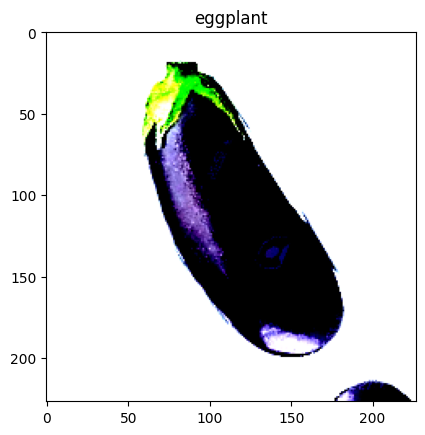

In [37]:
image,label = trainset[0] 
class_list = ['cucumber','eggplant','mushroom']

plt.imshow(image.permute(1,2,0))
plt.title(class_list[label]);


In [38]:
print(f"No. of examples in the trainset {len(trainset)}")
print(f"No. of examples in the validset {len(validset)}")

No. of examples in the trainset 148
No. of examples in the validset 38


In [39]:
trainloader = DataLoader(trainset,batch_size = BATCH_SIZE, shuffle=True)
validloader = DataLoader(validset,batch_size = BATCH_SIZE)


In [40]:
print(f"No. of batches in trainloader : {len(trainloader)}")
print(f"No. of batches in validloader : {len(validloader)}")

No. of batches in trainloader : 10
No. of batches in validloader : 3


In [41]:
for images,labels in trainloader:
  break

print(f"One batch image shape : {images.shape}")
print(f"One batch label shape : {labels.shape}")

One batch image shape : torch.Size([16, 3, 227, 227])
One batch label shape : torch.Size([16])


In [42]:
class ImageModel(nn.Module):
  def __init__(self):
    super(ImageModel,self).__init__()

    self.feature_extractor = nn.Sequential(
        
        nn.Conv2d(in_channels = 3,out_channels = 16, kernel_size = (5, 5), padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (4, 4), stride = 2),

        nn.Conv2d(in_channels = 16,out_channels = 16, kernel_size = (5, 5), padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (4, 4), stride = 2),

        nn.Conv2d(in_channels = 16,out_channels = 32, kernel_size = (5, 5), padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (4, 4), stride = 2),

        nn.Conv2d(in_channels = 32,out_channels = 64, kernel_size = (5, 5), padding = 1),
        nn.ReLU(),
    )

    self.maxpool = nn.MaxPool2d(kernel_size = (4,4), stride = 2)

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(6400,2048),
        nn.ReLU(),
        nn.Linear(2048,3)
    )

    self.gradient = None

  def activations_hook(self,grad):
    self.gradient = grad
    
  def forward(self,images):
  
    x = self.feature_extractor(images)

    h = x.register_hook(self.activations_hook)
    x = self.maxpool(x)
    x = self.classifier(x)

    return x

  def get_activation_gradients(self):
    return self.gradient
  
  def get_activation(self,x):
    return self.feature_extractor(x)

In [43]:
model = ImageModel()
model.to(DEVICE)

ImageModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6400, out_features=2048, bias=True)
    (2): ReLU()
    (3): Linear(in_features=2048, out_features=3, bias=True)
  )
)

In [44]:
def train_fn(dataloader,model,optimizer,criterion):

  model.train()
  total_loss = 0.0
  for images,labels in tqdm(dataloader):
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)
    
    optimizer.zero_grad()
    logits = model(images) #outputs without any softmax or sigmoid activation layer
    loss = criterion(logits,labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
  return total_loss / len(dataloader)


In [45]:
def eval_fn(dataloader,model,criterion):

  model.eval()
  total_loss = 0.0
  for images,labels in tqdm(dataloader):
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)
    
    logits = model(images) #outputs without any softmax or sigmoid activation layer
    loss = criterion(logits,labels)

    total_loss += loss.item()
  return total_loss / len(dataloader)

In [46]:
optimizer = torch.optim.Adam(model.parameters(),lr = LR)
criterion = torch.nn.CrossEntropyLoss()

In [51]:
best_valid_loss = np.inf

for i in range(EPOCHS):

  train_loss = train_fn(trainloader,model,optimizer,criterion)
  valid_loss = eval_fn(validloader,model,criterion)

  if valid_loss < best_valid_loss:
    torch.save(model.state_dict(),'best_weights.pt')
    print('SAVED_WEIGHTS_SUCCESS')

  print(f'EPOCH : {i + 1} TRAIN_LOSS : {train_loss} VALID_LOSS : {valid_loss}')

100%|██████████| 3/3 [00:00<00:00, 36.23it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 1 TRAIN_LOSS : 0.04644145898055285 VALID_LOSS : 0.11008406671074529


100%|██████████| 3/3 [00:00<00:00, 38.17it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 2 TRAIN_LOSS : 0.06296726698055863 VALID_LOSS : 0.17987690214067698


100%|██████████| 3/3 [00:00<00:00, 36.00it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 3 TRAIN_LOSS : 0.06682186252437532 VALID_LOSS : 0.1379618619879087


100%|██████████| 3/3 [00:00<00:00, 38.45it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 4 TRAIN_LOSS : 0.06367223042761908 VALID_LOSS : 0.41000022863348323


100%|██████████| 3/3 [00:00<00:00, 39.32it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 5 TRAIN_LOSS : 0.12870957294362598 VALID_LOSS : 0.34749828092753887


100%|██████████| 3/3 [00:00<00:00, 25.15it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 6 TRAIN_LOSS : 0.13086640902329236 VALID_LOSS : 0.18963296245783567


100%|██████████| 3/3 [00:00<00:00, 23.12it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 7 TRAIN_LOSS : 0.07359772133640945 VALID_LOSS : 0.37641462838898104


100%|██████████| 3/3 [00:00<00:00, 17.92it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 8 TRAIN_LOSS : 0.05030110171064735 VALID_LOSS : 0.12037427995043497


100%|██████████| 3/3 [00:00<00:00, 22.86it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 9 TRAIN_LOSS : 0.05834726464236155 VALID_LOSS : 0.3013315511246522


100%|██████████| 3/3 [00:00<00:00, 35.84it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 10 TRAIN_LOSS : 0.07087239348911681 VALID_LOSS : 0.27245078414368135


100%|██████████| 3/3 [00:00<00:00, 34.78it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 11 TRAIN_LOSS : 0.10119360114913434 VALID_LOSS : 0.04274792214467501


100%|██████████| 3/3 [00:00<00:00, 37.27it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 12 TRAIN_LOSS : 0.1473849299538415 VALID_LOSS : 0.2984589750800903


100%|██████████| 3/3 [00:00<00:00, 37.05it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 13 TRAIN_LOSS : 0.11151104220189154 VALID_LOSS : 0.48196786642074585


100%|██████████| 3/3 [00:00<00:00, 38.99it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 14 TRAIN_LOSS : 0.11449329946190119 VALID_LOSS : 0.240416893735528


100%|██████████| 3/3 [00:00<00:00, 38.91it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 15 TRAIN_LOSS : 0.1008604422211647 VALID_LOSS : 0.42461856951316196


100%|██████████| 3/3 [00:00<00:00, 38.13it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 16 TRAIN_LOSS : 0.05201668126974255 VALID_LOSS : 0.03375685789311925


100%|██████████| 3/3 [00:00<00:00, 35.36it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 17 TRAIN_LOSS : 0.02736503288615495 VALID_LOSS : 0.04336489678826183


100%|██████████| 3/3 [00:00<00:00, 38.50it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 18 TRAIN_LOSS : 0.0390722897802334 VALID_LOSS : 0.22593391415042183


100%|██████████| 3/3 [00:00<00:00, 33.96it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 19 TRAIN_LOSS : 0.08525780880299863 VALID_LOSS : 0.23673195842032632


100%|██████████| 3/3 [00:00<00:00, 37.40it/s]


SAVED_WEIGHTS_SUCCESS
EPOCH : 20 TRAIN_LOSS : 0.06472187785548159 VALID_LOSS : 0.07945220459563036


In [48]:
def get_gradcam(model,image,label,size):

  label.backward()
  gradients = model.get_activation_gradients()
  pooled_gradients = torch.mean(gradients,dim = [0, 2, 3])
  activations = model.get_activation(image).detach()

  for i in range(activations.shape[1]):
    activations[:, i, :, :] *= pooled_gradients[i]

  heatmap = torch.mean(activations, dim = 1).squeeze().cpu()
  heatmap = nn.ReLU()(heatmap)
  heatmap /= torch.max(heatmap)
  heatmap = cv2.resize(heatmap.numpy(), (size,size))

  return heatmap


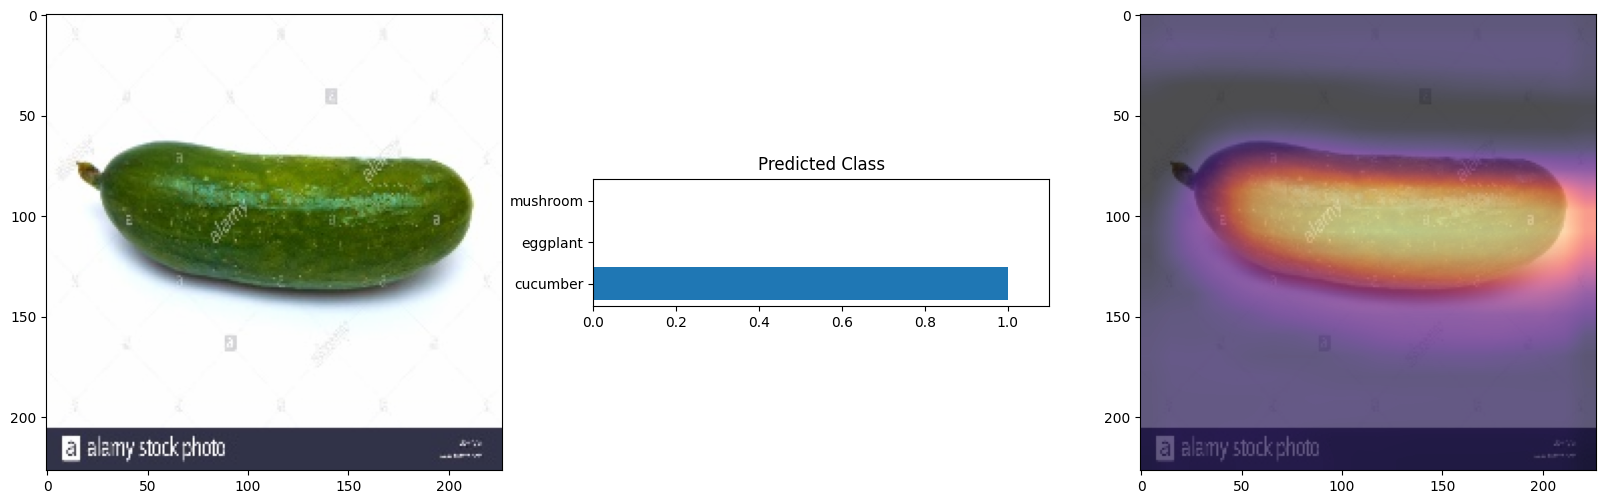

In [49]:
image, label = validset[8]

denorm_image = image.permute(1, 2, 0) * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))

image = image.unsqueeze(0).to(DEVICE)

pred = model(image)
heatmap = get_gradcam(model, image, pred[0][2], size=227)
utils.plot_heatmap(denorm_image, pred, heatmap)